# Analisis de Sentimientos con las librerias TextBlob y TextaCy

In [29]:
# Cargamos las librerias necesarias
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import string
import pickle
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction import text 
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from wordcloud import WordCloud

In [2]:
# Funciones auxiliares
def limpiar_texto(text):
    '''
        Esta funcion recibe una estrada en str y remueve del mismo
        todos los caracteres que no son palabras
    '''
    text = text.lower()
    text = re.sub('\[.*?¿\]\%', ' ', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), ' ', text)
    text = re.sub('\w*\d\w*', '', text)
    text = re.sub('[‘’“”…«»]', '', text)
    text = re.sub('\n', ' ', text)
    return text

In [3]:
# Vamos a usar dos dataset que difieren en su formato
# Asi que los vamos a normalizar un poco

# Definimos el nombre de las columnas que tendra el dataset
col_nombre = ['Año','Mes', 'Dia','Titular']

In [4]:
# Cargamos los titulares de lanacion
# le ponemos nombre a las columnas y no lo dejamos elegir el titulo automatico
data_ln = pd.read_csv("tit_lanacion.csv", usecols=(0,1,2,4),names=col_nombre, header=None)
# Nos aseguramos que la columna Titular sea del tipo string
data_ln['Titular'] = data_ln['Titular'].astype(str)
data_ln.head()

,Año,Mes,Dia,Titular
0,2006,9,10,bajo el signo del terror
1,2006,9,13,apple renovó toda la familia ipod
2,2006,9,14,por las canchas
3,2006,9,15,argentinos en francia
4,2006,9,15,¿un loco suelto en hollywood?


In [5]:
# Cargamos los titulares de perfil
# le ponemos nombre a las columnas y no lo dejamos elegir el titulo automatico
data_pe = pd.read_csv("tit_perfil.csv", usecols=(0,1,2,3),names=col_nombre, header=None)
# Nos aseguramos que la columna Titular sea del tipo string
data_pe['Titular'] = data_pe['Titular'].astype(str)
data_pe.head()

,Año,Mes,Dia,Titular
0,2006,9,10,córdoba: alianza delasotista se impone en marc...
1,2006,9,10,el reclutamiento docente cae en picada
2,2006,9,10,"relatos de una obsesión: ""ya no podía entrar a..."
3,2006,9,10,el fuego en la mente de los hombres
4,2006,9,10,será injusticia


In [6]:
# Cargamos las librerias necesarias
import textblob
from textblob import TextBlob

### Extraemos el texto desde los dataset a un string

In [7]:
# Cada columna de un pd es una "serie" que se puede extraer a una lista 
# y que se concatena en un string 
# En txt_ln queda el texto de todos los titulares
txt_ln_list = data_ln["Titular"].tolist()
txt_ln = ' '.join(txt_ln_list)

# Este texto tiene muchos caracteres que no son palabras
# Asi que los vamos a extraer con las funciones ya creadas
txt_ln_limpio = limpiar_texto(txt_ln)

#print(txt_ln)

In [8]:
# Cada columna de un pd es una "serie" que se puede extraer a una lista 
# y que se concatena en un string 
# En txt_pe queda el texto de todos los titulares
txt_pe_list = data_pe["Titular"].tolist()
txt_pe = ' '.join(txt_pe_list)

# Este texto tiene muchos caracteres que no son palabras
# Asi que los vamos a extraer con las funciones ya creadas
txt_pe_limpio = limpiar_texto(txt_pe)

print(txt_pe_limpio)

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



### Extraemos el texto desde los dataset por año

In [11]:
# Vamos a tener dos diccionarios con el año como key y el texto de los titulares
# de ese año como value
# Y luego pasamos ese dict a un dataframe
ln_x_anno = {} 
pe_x_anno = {}
for anno in range(2006,2017):
    # Primero con lanacion
    txt_ln_serie_anno = data_ln.query("Año == @anno")["Titular"].tolist()
    # juntamos los textos y los limpiamos
    txt_ln_anno = limpiar_texto(' '.join(txt_ln_serie_anno))
    # Creamos el dict base
    ln_x_anno[anno] = txt_ln_anno
    
    # Luego con perfil
    txt_pe_serie_anno = data_pe.query('Año == @anno')["Titular"].tolist()
    # juntamos los textos y los limpiamos
    txt_pe_anno = limpiar_texto(' '.join(txt_pe_serie_anno))
    # Creamos el dict base
    pe_x_anno[anno] = txt_pe_anno

# Los convertimos en dataframes
ln_anno = pd.DataFrame.from_dict(ln_x_anno, orient='index',columns=['Texto'])
pe_anno = pd.DataFrame.from_dict(pe_x_anno, orient='index',columns=['Texto'])

# Mostramos 
ln_anno

,Texto
2006,bajo el signo del terror apple renovó toda la ...
2007,cómo saber si tu computadora será capaz de usa...
2008,cartas de lectores el misterio de rimbaud en l...
2009,la mejor publicidad del año episodio ii algo ...
2010,el inicio del dakar fue a pura emoción en buen...
2011,dakar mendoza aporta participantes bajo el...
2012,concurso el album de la argentina bases vícti...
2013,agreden a una chica filman la paliza y suben ...
2014,el niño grande que nos sigue sorprendiendo en ...
2015,sospechan que a lola chomnalez la habrían ases...


In [12]:
pe_anno

,Texto
2006,córdoba alianza delasotista se impone en marc...
2007,la historia se repite más de cien heridos con...
2008,atentados y operativos de seguridad oscurecen ...
2009,balas perdidas corchos riñas callejeras e in...
2010,peajes bien chévere los placeres mínimos de ca...
2011,toman otro predio en villa lugano durante los ...
2012,murió el gobernador de río negro quién asume e...
2013,pablo echarri la militancia me llegó tarde ...
2014,no creo que haya amor creo que hay propiedad ...
2015,caso lola aseguran que es extremadamente com...


### Hacemos el bag of words con LaNacion

In [20]:
# Descargamos un diccionario de palabras en español para reconocer las palabras
# Esta en el archivo spanish.txt

with open('spanish.txt') as f:
    lines = f.read().splitlines()
    
# Ahora hacemos un conteo para ver cuantas de las palabras del diccionario se usan por año
# en el texto de los titulares
cv = CountVectorizer(stop_words=lines)
data_cv = cv.fit_transform(ln_anno.Texto)
data_dtm = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_dtm.index = ln_anno.index

# Vamos a guardar copia de la informacion extraida (por las dudas...)
data_dtm.to_pickle("dtm_ln.pkl")
ln_anno.to_pickle('ln_anno.pkl')
pickle.dump(cv, open("cv_ln.pkl", "wb"))

# Mostramos el bag of word
data_dtm

,aa,abandona,abandonar,abandonó,abanico,abasto,abdicación,abdominal,abierta,abiertas,...,órganos,última,últimamente,último,últimos,única,único,únicos,útil,útiles
2006,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2007,0,0,0,0,0,1,0,0,0,0,...,0,2,0,4,0,1,0,0,0,1
2008,0,0,0,0,1,0,0,0,0,0,...,0,0,1,5,0,1,0,0,0,0
2009,0,0,0,0,0,0,0,0,0,1,...,0,0,0,2,1,0,0,0,0,0
2010,1,0,0,0,0,1,0,0,0,0,...,0,1,0,1,0,0,0,0,0,0
2011,0,0,0,0,0,0,0,0,0,0,...,1,1,0,0,0,0,1,1,1,0
2012,0,1,0,1,0,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2013,0,0,0,0,0,0,0,0,2,0,...,0,0,0,1,0,0,1,0,0,0
2014,0,0,0,0,0,0,1,1,3,0,...,0,0,0,2,0,0,0,0,0,0
2015,0,0,1,0,0,0,0,0,0,0,...,0,2,0,1,1,0,0,0,0,0


In [21]:
# Veamos la informacion de otra forma 
data = pd.read_pickle('dtm_ln.pkl')
data = data.transpose()
data.head()

,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
aa,0,0,0,0,1,0,0,0,0,0,0
abandona,0,0,0,0,0,0,1,0,0,0,0
abandonar,0,0,0,0,0,0,0,0,0,1,0
abandonó,0,0,0,0,0,0,1,0,0,0,0
abanico,0,0,1,0,0,0,0,0,0,0,0


In [25]:
# Veamos las palabras mas usadas por año
top_dict = {}
for c in data.columns:
    top = data[c].sort_values(ascending=False).head(30)
    top_dict[c]= list(zip(top.index, top.values))
# print(top_dict)
# Ordenamos y mostramos las 15 mas usadas
for anio, top_words in top_dict.items():
    print(anio)
    print(', '.join([word for word, count in top_words[0:14]]))

2006
polideportivo, lectores, cartas, sellers, best, dos, buenos, aires, hoy, rural, libro, mejor, día, libros
2007
lectores, cartas, cine, best, sellers, gran, libros, nuevo, harry, potter, fiesta, mundo, breves, año
2008
lectores, cartas, mejor, fiesta, nuevo, bases, concurso, argentina, nueva, novela, nacion, música, premio, cine
2009
agenda, internet, mejores, videos, insólitos, argentina, mundo, cartas, lectores, crisis, nueva, nuevo, mejor, mundial
2010
mejores, videos, insólitos, internet, buenos, aires, cine, mundial, nuevos, lectores, gran, argentina, año, noche
2011
argentina, gran, polideportivo, nuevo, hoy, historia, cinco, gadgets, mejor, común, lectores, geekmanía, libro, cómo
2012
gran, nueva, nuevo, argentina, fiesta, festival, país, mejor, mundo, windows, cómo, noche, obra, casa
2013
agenda, cultural, argentina, mundo, buenos, nueva, feria, cómo, papa, aires, presentó, libros, nuevo, país
2014
mundial, argentina, nuevo, hoy, fiesta, cómo, arte, mundo, cine, aires, buen

In [28]:
# Podemos ver que hay palabras sin sentido e incluso en otros idiomas 
# que no aportan al analisis. Intentaremos removerlas


# De cada año sacamos las palabras mas usadas
# Y creamos un diccionario con esas palabras
words = []
for anio in data.columns:
    top = [word for (word, count) in top_dict[anio]]
    for t in top:
        words.append(t)
#print(Counter(words).most_common())
add_stop_words = [word for word, count in Counter(words).most_common() if count > 6]
add_stop_words

['lectores',
 'mundo',
 'argentina',
 'cartas',
 'nuevo',
 'mejor',
 'gran',
 'fiesta',
 'año',
 'nueva']

In [35]:
# Leemos nuevamente el archivo de las palabras por año
data_clean = pd.read_pickle('ln_anno.pkl')

# Vemos nuestro diccionario de palabras comunes
# Y le agregamos algunas de nuestra cosecha
with open('spanish.txt') as f:
    stop_words = f.read().splitlines()
for pal in add_stop_words:
    stop_words.append(pal)
more_stop_words=['best','seller','maradona','mirta','tres','lectores','carta','dos','uno','veces', 'así', 'luego', 'quizá','cosa','cosas','tan','asi','andres','todas','sólo','jesús','pablo','pepe']
for pal in more_stop_words:
    stop_words.append(pal)

# Recreamos el diccionario con los agregados
cv = CountVectorizer(stop_words=stop_words)
data_cv = cv.fit_transform(data_clean.Texto)
data_stop = pd.DataFrame(data_cv.toarray(), columns=cv.get_feature_names())
data_stop.index = data_clean.index

# Lo guardamos para siguientes usos
pickle.dump(cv, open("cv_stop.pkl", "wb"))
data_stop.to_pickle("dtm_stop.pkl")


#### Ahora si hacemos los Clouds of Words por año de LaNacion

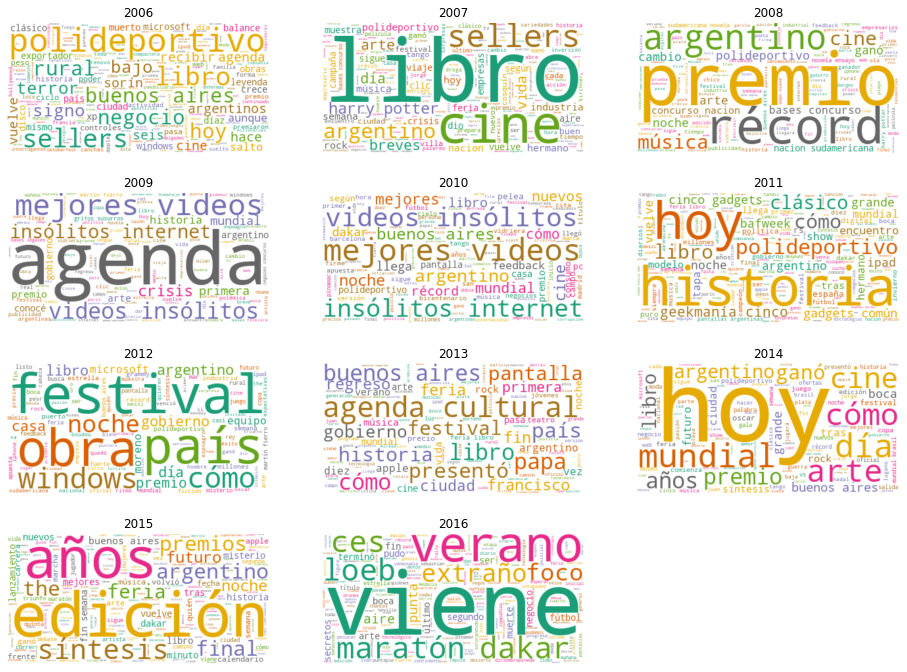

In [42]:
# Con la libreria WordCloud creamos las nubes
wc = WordCloud(stopwords=stop_words, background_color="white", colormap="Dark2",
               max_font_size=150, random_state=42)
plt.rcParams['figure.figsize'] = [16,12]

# Create subplots por cada año
for index, anio in enumerate(data.columns):
    wc.generate(data_clean.Texto[anio])
    plt.subplot(4, 3, index+1)
    plt.imshow(wc, interpolation="bilinear")
    plt.axis("off")
    # Esto es para arreglar la falta de columna que indique el año (usamos index) 
    plt.title(index + 2006)
plt.show()

### Asignamos el sentiment a cada titular

### Calculamos y Graficamos los sentimientos segun años

## Probamos con TextaCy

In [ ]:
# Importando las librerías que vamos a utilizar
import textacy
from textacy.datasets import Wikipedia
from collections import Counter, defaultdict
import warnings; warnings.simplefilter('ignore')

# graficos incrustados
%matplotlib inline

### Extraemos el texto desde los dataset

### Hacemos el bag of words

### Asignamos el sentiment a cada titular

### Calculamos y Graficamos los sentimientos segun años